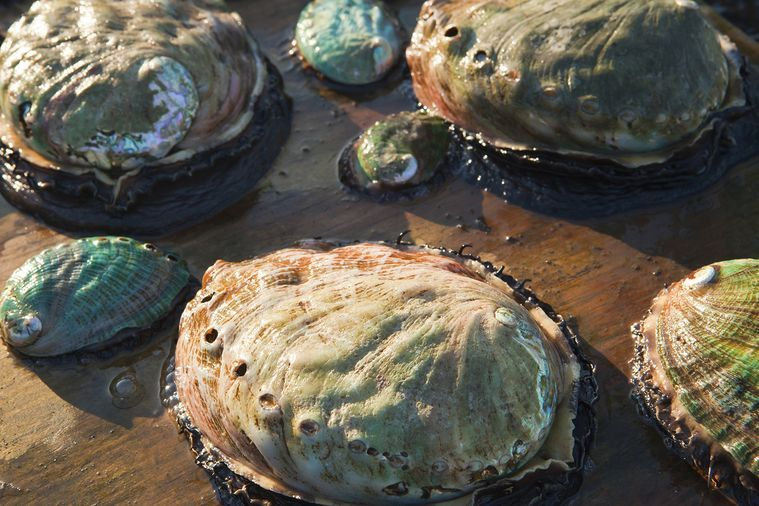

In [22]:
from IPython.display import display
from PIL import Image
import requests
from io import BytesIO

url = "https://img.delicious.com.au/cVykI72g/w759-h506-cfill/del/2017/02/abalone-42448-2.jpg"
response = requests.get(url)
img = Image.open(BytesIO(response.content))
display(img)

In [23]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np

# fetch dataset 
abalone = fetch_ucirepo(id=1) 
  
# data (as pandas dataframes) 
df = abalone.data.features 
y = abalone.data.targets 


# variable information 
display(df)
display(y)



,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


,Rings
0,15
1,7
2,9
3,10
4,7
...,...
4172,11
4173,10
4174,9
4175,10


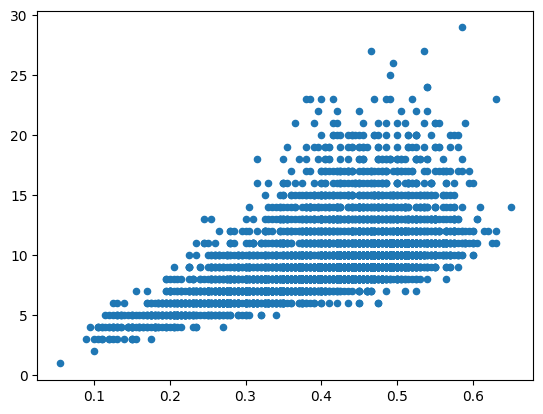

In [24]:
import matplotlib.pyplot as plt

X = df[["Diameter"]]
plt.scatter(X,y,s=20)

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
display(X_train,y_train)

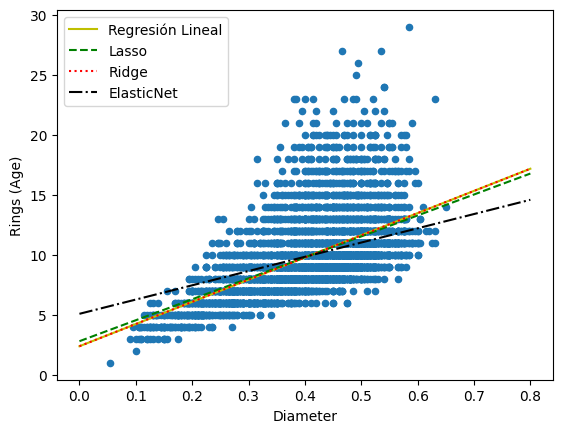

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
import warnings
warnings.filterwarnings("ignore")

reg = LinearRegression()
laso = Lasso(alpha=.01,max_iter=1000)
ridge = Ridge(alpha=.01,max_iter=1000)
elastic = ElasticNet(alpha=.01,max_iter=1)

reg.fit(X_train,y_train)
laso.fit(X_train,y_train)
ridge.fit(X_train,y_train)
elastic.fit(X_train,y_train)

X_plot = np.linspace(0,.8,100).reshape(-1,1)

y_plot_reg = reg.predict(X_plot)
y_plot_lasso = laso.predict(X_plot)
y_plot_ridge = ridge.predict(X_plot)
y_plot_elastic = elastic.predict(X_plot)




plt.scatter(X,y,s=20)
plt.xlabel("Diameter")
plt.ylabel("Rings (Age)")
plt.plot(X_plot, y_plot_reg, color="y", linestyle="-",   label="Regresión Lineal")
plt.plot(X_plot, y_plot_lasso, color="g", linestyle="--",  label="Lasso")
plt.plot(X_plot, y_plot_ridge, color="r", linestyle=":",   label="Ridge")
plt.plot(X_plot, y_plot_elastic, color="k", linestyle="-.", label="ElasticNet")

plt.legend()
plt.show()


In [29]:
from sklearn.metrics import r2_score


y_r2_reg_train = reg.predict(X_train)
y_r2_lasso_train = laso.predict(X_train)
y_r2_ridge_train = ridge.predict(X_train)
y_r2_elastic_train = elastic.predict(X_train)

y_r2_reg_test = reg.predict(X_test)
y_r2_lasso_test = laso.predict(X_test)
y_r2_ridge_test = ridge.predict(X_test)
y_r2_elastic_test = elastic.predict(X_test)

print("Training score")
print("LinearRegression:",r2_score(y_train,y_r2_reg_train)*100)
print("Lasso:",r2_score(y_train,y_r2_lasso_train)*100)
print("Ridge:",r2_score(y_train,y_r2_ridge_train)*100)
print("ElasticNet:",r2_score(y_train,y_r2_elastic_train)*100)

print("Testing score")
print("LinearRegression:",r2_score(y_test,y_r2_reg_test)*100)
print("Lasso:",r2_score(y_test,y_r2_lasso_test)*100)
print("Ridge:",r2_score(y_test,y_r2_ridge_test)*100)
print("ElasticNet:",r2_score(y_test,y_r2_elastic_test)*100)





Training score
LinearRegression: 32.36554355076515
Lasso: 32.26567012843533
Ridge: 32.36554049384039
ElasticNet: 28.225516018302432
Testing score
LinearRegression: 35.49138703362695
Lasso: 35.22283978220809
Ridge: 35.49045290097111
ElasticNet: 30.25198561049477
